1 


In [2]:
import numpy as np
np.diag([1,2,3,4],k=-1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

2

In [10]:
import numpy as np
a=np.random.rand(10,3)
b=np.argmin(np.absolute(a-0.5),axis=1)
c=np.zeros(10)
for i in range(10):
    c[i]=a[i][[b[i]]]
print(c)

[0.43688769 0.1992177  0.56428082 0.61793146 0.45278258 0.73496814
 0.50600063 0.38618241 0.46584868 0.39312288]


3

In [12]:
import numpy as np
a = np.random.rand(6, 6)
b = np.amax(a,axis=0)
for i in range(6):
    print(i,a[i].sum()/b[i])

0 3.0660559285692526
1 2.2387534470669794
2 3.214714623433339
3 3.4077296457637534
4 2.914709289353755
5 4.066513121978596


4

In [16]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(np.max(x[1:][(x==0)[:-1]]))

5


5

In [4]:
import numpy as np
x=np.ones(10)
i=np.array([0,1,2,3,5,5,5,8])
for k in i:
    x[k]+=1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


6 math.trunc,round,// для округления вниз,floor,int()

7

In [4]:
import numpy
import math
import random

def generateData (numberOfClasses):
    data = []
    for classNum in range(numberOfClasses):
        centerX, centerY = random.random()*100, random.random()*100
        for rowNum in range(100):
            data.append([ [random.gauss(centerX,10), random.gauss(centerY,10)], classNum])
    return data


def dist(a, b):
        return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def classifyKNN(train, test, n, k):
    res = []
    for point in test:
        testDist = [[dist(point, train[i][0]), train[i][1]] for i in range(len(train))]
        stat = [0 for i in range(k)]
        for d in sorted(testDist)[0:n]:
            stat[d[1]] += 1
        res.append([point,sorted(zip(stat, range(k)), reverse=True)[0][1]])
    return res

train = generateData(3)
test = [[random.random()*100,random.random()*100] for i in range(10)]
print(classifyKNN(train,test,50,3))

[[[19.24665632488871, 71.59741808242752], 2], [[6.450245993462056, 51.95002098735847], 2], [[32.52802859789767, 63.03822304202408], 2], [[12.437828302257149, 95.8376325057121], 1], [[61.129531941171535, 19.53624990013073], 0], [[7.877824524513333, 98.53082927442692], 1], [[15.323964086354335, 18.439091830260224], 2], [[59.49199187808952, 26.13950610188267], 0], [[16.867694825331338, 10.851922329637354], 0], [[95.77738425483182, 37.884238997364214], 0]]


8

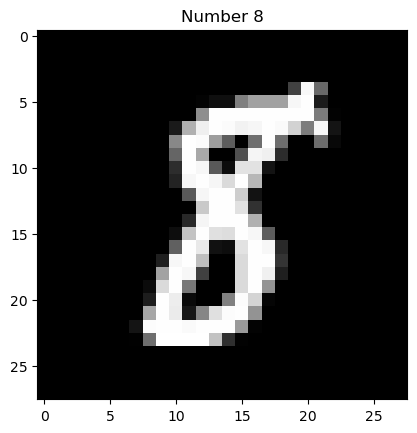

In [13]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

#Загрузка может занять около минуты
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
images.shape
labels.shape
i = 125
plt.imshow(images[i].reshape(28, 28), cmap='Greys_r')
plt.title('Number ' + labels[i])
plt.show()

In [17]:
train_size = 1000
train_images = images[:train_size]
train_labels = labels[:train_size]
test_size = 100
test_images = images[-test_size:]
test_labels = labels[-test_size:]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy=[]
for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_images, train_labels)
  test_pred = model.predict(test_images)
  
  accuracy.append([i,accuracy_score(test_pred,test_labels)])

print(sorted(accuracy,key = lambda x : x[1],reverse= True)[0][0])

1


C:\Users\Danila\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Danila\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Danila\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


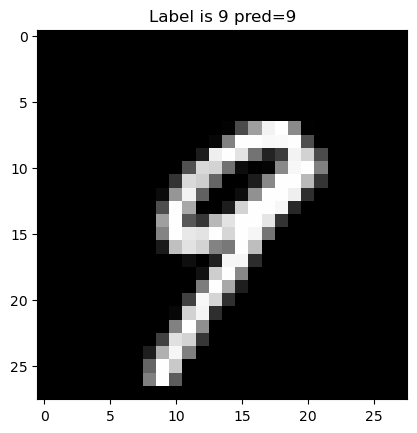

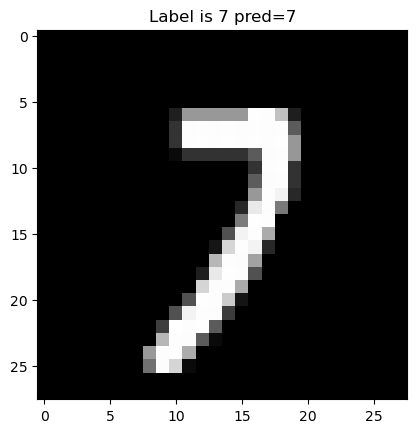

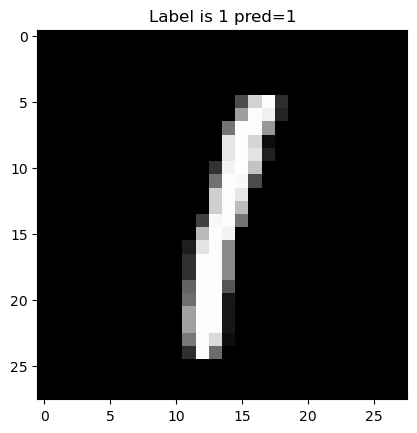

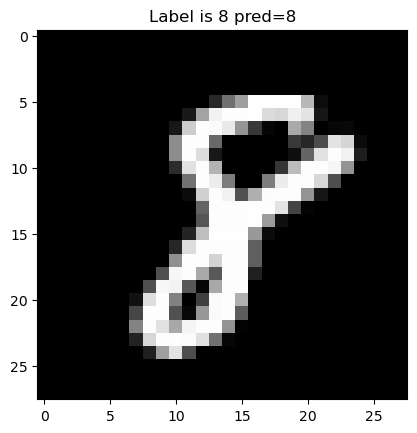

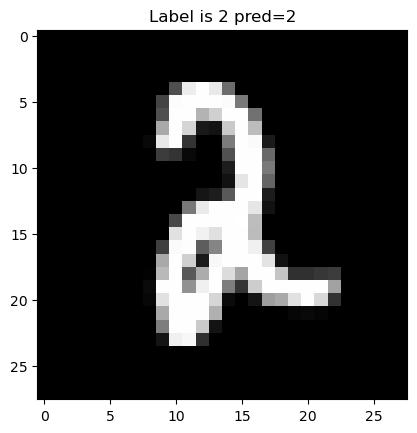

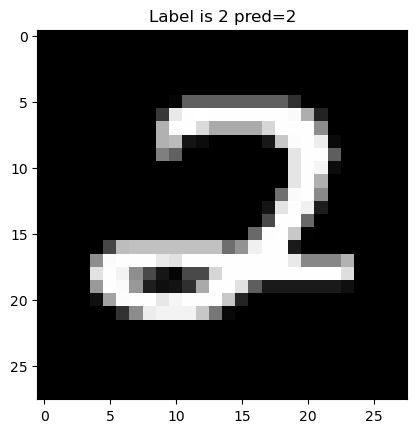

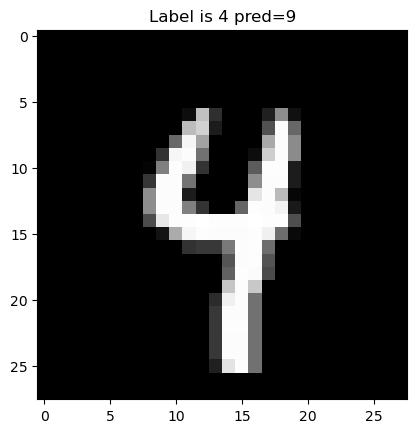

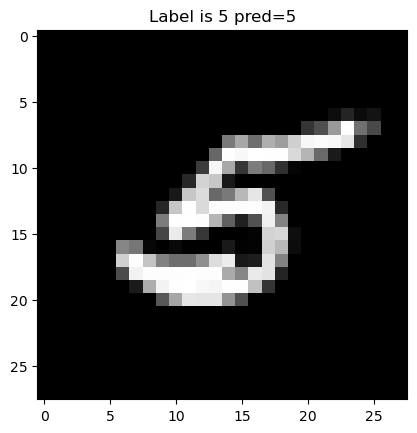

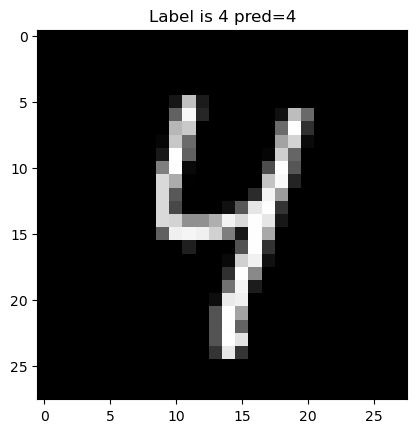

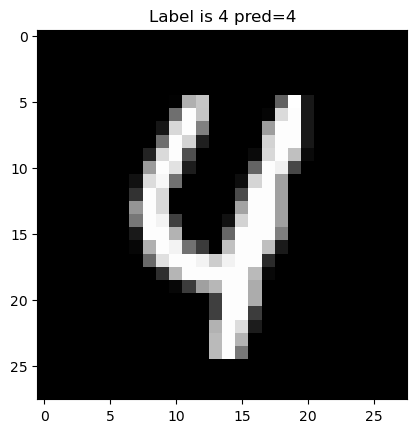

In [15]:
import matplotlib.pyplot as plt
import random
ns =   [int(random.random()*images.shape[0]) for i in range(10)]

img_s = [images[i] for i in ns]
l_s = [labels[i] for i in ns]

pred = model.predict(img_s)
for i in range(len(ns)):
  # Plot
  plt.title('Label is {label} pred={p}'.format(label=l_s[i],p=pred[i]))
  plt.imshow(img_s[i].reshape(28,28), cmap='gray')
  plt.show()